Data für 2015 loaded succsessfully.
Data für 2016 loaded succsessfully.
Data für 2017 loaded succsessfully.
Data für 2018 loaded succsessfully.
Data für 2019 loaded succsessfully.
Data für 2020 loaded succsessfully.
Data für 2021 loaded succsessfully.
Data für 2022 loaded succsessfully.
Data für 2023 loaded succsessfully.
Data für 2023 loaded succsessfully.
                    Datum    Differenz Year Month Day
0     2030-01-01 00:00:00  2713.895385    2030 01  01
1     2030-01-01 00:15:00  2511.901102    2030 01  01
2     2030-01-01 00:30:00  2174.559249    2030 01  01
3     2030-01-01 00:45:00  2393.623849    2030 01  01
4     2030-01-01 01:00:00  2004.345863    2030 01  01
...                   ...          ...        ...  ..
35035 2030-12-31 22:45:00  2675.650795    2030 12  31
35036 2030-12-31 23:00:00  2662.133043    2030 12  31
35037 2030-12-31 23:15:00  2531.624569    2030 12  31
35038 2030-12-31 23:30:00  2330.997366    2030 12  31
35039 2030-12-31 23:45:00  2143.091762    2030

/Users/private/Desktop/Projects/Klimaneutral-20245/utils/plotCalendarHeatmap.py:7: FutureWarning: The provided callable <function sum at 0x110ac6b60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  heatmap_data = df.pivot_table(index='Year Month', columns='Day', values=colName, aggfunc=np.sum)    # aggfunc=np.sum ->Werte summiert über den Tag!


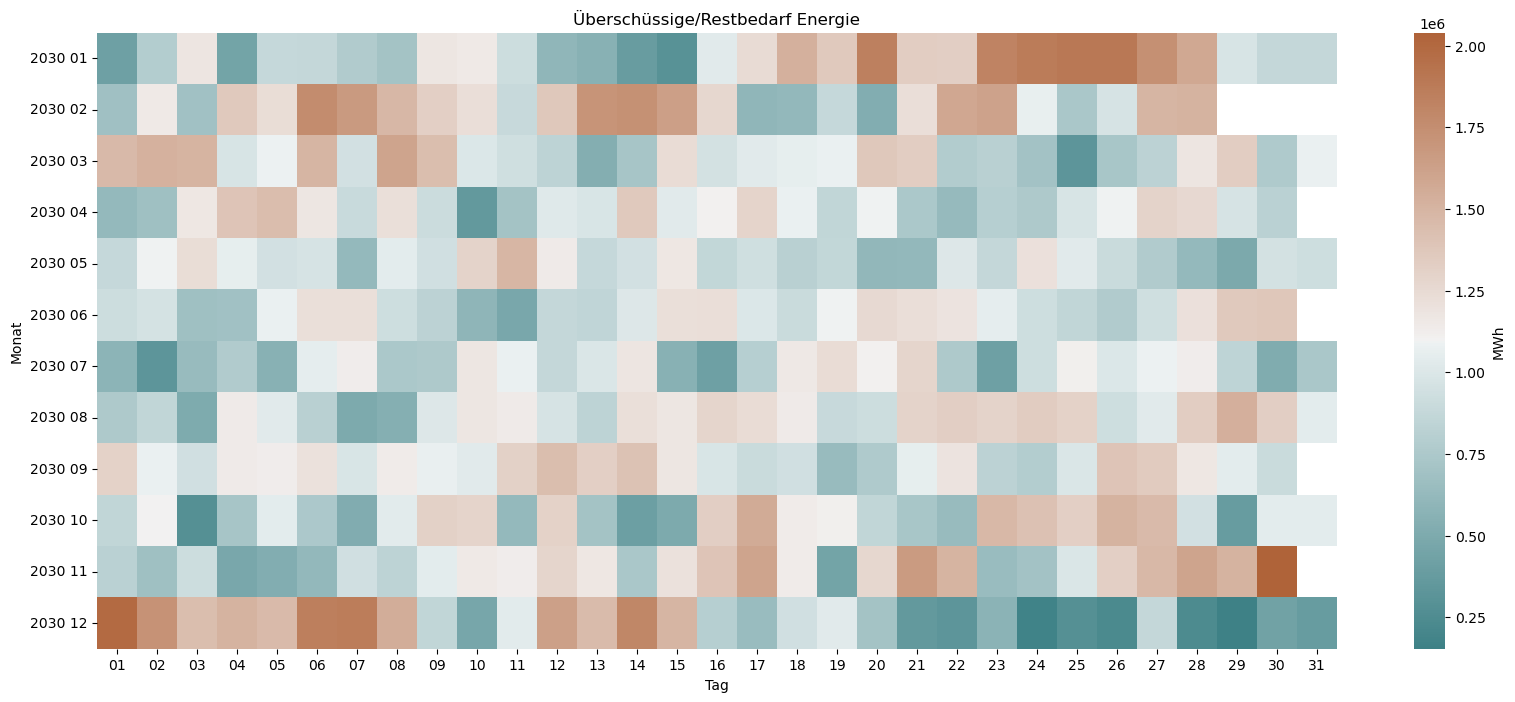

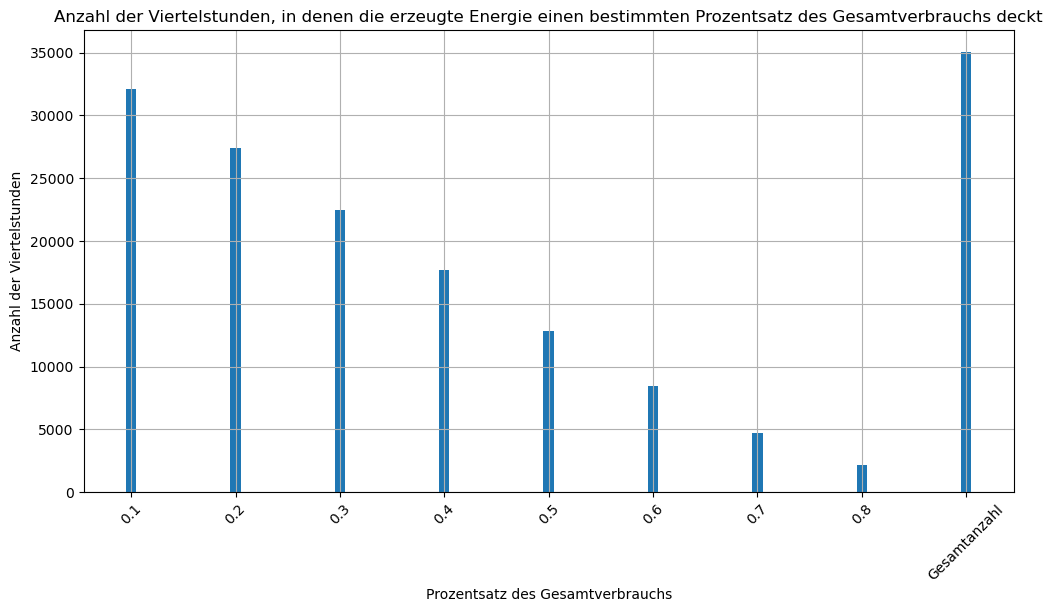

Insgesamt müssen 375593.0192731712 GWh über fossile Brennstoffe erzeugt werden.
Es werden insgesamt 108344140.17495322 Tonnen CO2 emittiert. Davon sind 77526251.41407764 Tonnen CO2 aus Kohle und 30817888.76087559 Tonnen CO2 aus Gas.


In [3]:
%run prototyp_1.ipynb

# Dataframe mit Differenz zw. Erzeugung und Verbrauch pro Jahr

* dataframe anlegen
* für die Jahre 2023-2030 über die dataframes directory_yearly_generation und directory_yearly_consumption iterieren und jeweils Jahressummen bilden.
* berücksichtigt werden in der Erzeugung nur 'Wind Offshore', 'Wind Onshore' und 'Photovoltaik'
* Differenzen zwischen Jahressummen werden abgespeichert

In [4]:

# Annahme: directory_yearly_generation und directory_yearly_consumption sind Dictionaries, die DataFrames für jedes Jahr enthalten

# Erstelle einen leeren DataFrame, um die Ergebnisse zu speichern
all_years_difference_df = pd.DataFrame()

# Iteriere durch jedes Jahr in den Dictionaries
for year in range(2023, 2030):  # Beispiel: von 2023 bis 2031
    if year in directory_yearly_generation and year in directory_yearly_consumption:
        production_df = directory_yearly_generation[year]
        consumption_df = directory_yearly_consumption[year]
        
        # Berechne die Gesamterzeugung_EE
        required_columns = ['Wind Offshore', 'Wind Onshore', 'Photovoltaik']
        if all(column in production_df.columns for column in required_columns):
            production_df['Gesamterzeugung_EE'] = production_df[required_columns].sum(axis=1)
        else:
            print(f"Eine oder mehrere der erforderlichen Spalten fehlen im DataFrame für das Jahr {year}.")
            continue
        
        # Überprüfe, ob beide DataFrames die gleiche Zeitachse haben
        if consumption_df['Datum'].equals(production_df['Datum']):
            # Berechne die Differenz zwischen Verbrauch und Produktion
            difference_df = pd.DataFrame()
            difference_df['Datum'] = consumption_df['Datum']
            difference_df['Differenz'] =  production_df['Gesamterzeugung_EE'] - consumption_df['Gesamtverbrauch']
            difference_df['Jahr'] = year
            
            # Füge die Ergebnisse dem Gesamt-DataFrame hinzu
            all_years_difference_df = pd.concat([all_years_difference_df, difference_df], ignore_index=True)
        else:
            print(f"Die Zeitachsen der DataFrames stimmen für das Jahr {year} nicht überein.")
    else:
        print(f"DataFrames für das Jahr {year} fehlen in einem der Verzeichnisse.")



NameError: name 'directory_yearly_consumption' is not defined

# Diagramm für Residuallast (Differenz zw. EE-Erzeugung und Verbrauch)

### positive Differenz (Erzeugung > Verbrauch)
Hinweis auf eine Überschussproduktion, die EE-Erzeugung deckt den Verbrauch vollkommen und darüber hinaus. Der erzeugte Strom kann nicht vollständig verwendet werden (Exportmöglichkeit).


### negative Differenz (Erzeugung < Verbrauch)
Der Verbrauch ist höher als die EE-Erzeugung und kann also nicht abgedeckt werden. EE müssen ausgebaut werden.



### Trend
Die Differenz kann bei höherer Auflösung betrachtet evtl. schwanken -> saisonale Unterschiede in Produktionsmöglichkeiten für EE (bsp. im Winter weniger Sonne).
Ein positiver langfristiger Trend könnte auf eine erfolgreiche Integration erneuerbarer Energien hinweisen, während ein negativer langfristiger Trend auf Herausforderungen bei der Deckung des Energiebedarfs durch erneuerbare Energien hinweisen könnte.

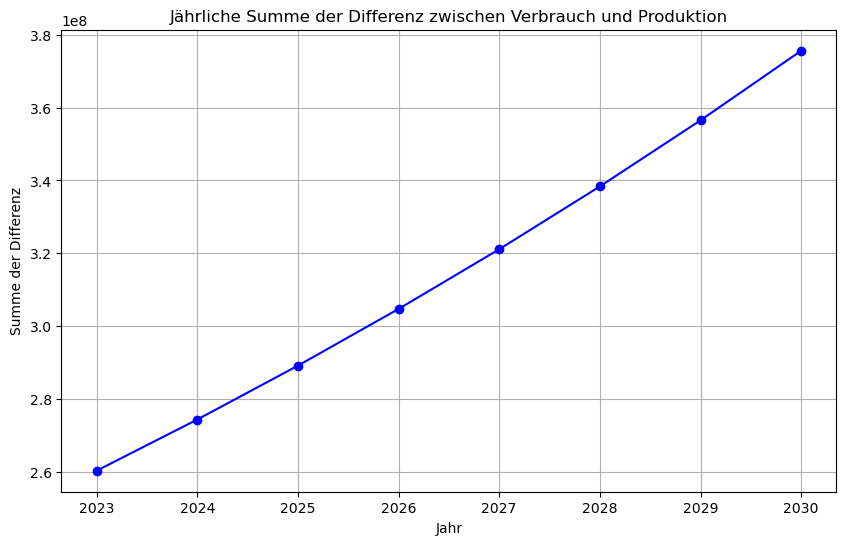

In [ ]:
import matplotlib.pyplot as plt

# Gruppiere nach Jahr und berechne die Summe der Spalte 'Differenz' für jedes Jahr
yearly_sums = all_years_difference_df.groupby('Jahr')['Differenz'].sum()

# Erstelle das Liniendiagramm
plt.figure(figsize=(10, 6))
plt.plot(yearly_sums.index, yearly_sums.values, marker='o', linestyle='-', color='b')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Summe der Differenz')
plt.title('Jährliche Summe der Differenz zwischen Verbrauch und Produktion')
plt.grid(True)

# Diagramm anzeigen
plt.show()